# Models

## Params Table

In [ ]:
from IPython.display import HTML, display
import tabulate

table = [["Params","Conv","MaxPool","Flatten","Dense", "Dropout", "Final Dense", "Accuracy","M.F1","AUC","Conf Matrix"],
         ["Model_1","3(32,3)",3,1,"1(128)",0,1,0.8],
         ["Model_2",3,3,1,1,0,1,0.8, 0.5],
         ["Model_3","3p",3,1,"2(120 & 60)",0.5,1,0.8],
         ["Model_4","2p",2,1,"2(120 & 60)",0.5,1,0.8],
         ["New_L",2,2,1,2,1,1,0.8, 0.5],
         ["New_D",2,2,1,2,1,1,0.8, 0.5],
         ["New_S",2,2,1,2,1,1,0.8, 0.5]]

display(HTML(tabulate.tabulate(table, tablefmt='html')))

In [ ]:
 model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(256, 256, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4, activation='softmax'))

## Prep Data

### Load Variables

In [ ]:
# pickle.dumps(, protocol=None, *, fix_imports=True, buffer_callback=None)

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from PIL import Image
import PIL
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [45]:
labels=['viral_pneumonia', 'covid-19', 'bacterial_pneumonia', 'normal']

def load_data():
    X, y = [], []
    
    for label in labels:
        path=os.path.join('balanced_raw_data', label)
        files=os.listdir(path)
        #print(files)
        
        for file_name in files:
            if file_name.endswith('.png') or file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
                file_path = os.path.join(path, file_name)
                image = Image.open(file_path)
                image = image.resize((256, 256))
                #image = image.convert('1')
           
            X.append(np.array(image))
            y.append(label)
            
    
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
    return X, y

In [3]:
viral = os.listdir("balanced_raw_data/viral_pneumonia")

In [33]:
viral = [file  for file in os.listdir("balanced_raw_data/viral_pneumonia") if file.endswith('.png') or file.endswith('.jpg') or file.endswith('.jpeg')]

In [30]:
bacterial =  [file  for file in os.listdir("balanced_raw_data/bacterial_pneumonia") if file.endswith('.png') or file.endswith('.jpg') or file.endswith('.jpeg')]

In [31]:
covid = [file  for file in os.listdir("balanced_raw_data/covid-19") if file.endswith('.png') or file.endswith('.jpg') or file.endswith('.jpeg')]

In [36]:
normal = [file  for file in os.listdir("balanced_raw_data/normal") if file.endswith('.png') or file.endswith('.jpg') or file.endswith('.jpeg')]

In [46]:
X, y = load_data();

In [47]:
X,y 

((array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ..., 11,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
  array([[151, 149, 146, ...,   0,   0,   0],
         [148, 155, 151, ...,   0,   0,   0],
         [138, 157, 155, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
  array([[ 25,  23,  25, ..., 170, 164, 162],
         [ 22,  20,  23, ..., 169, 164, 160],
         [ 21,  20,  23, ..., 162, 164, 170],
         ...,
         [ 27,  27,  27, ...,  25,  25,  22],
         [ 27,  27,  27, ...,  24,  25,  23],
         [ 27,  27,  27, ...,  23,  23,  22]], dtype=uint8),
  array([[ 0,  0,  0, ...,  6,  5,  4],
         [ 0,  0,  0, ...,  5,  4,  4],
         [ 0,  0,  0, ...,  6,  4,  3],
 

In [49]:
X_clean=[]
y_clean=[]
index=0

for image in X:
    if image.ndim ==2:
        X_clean.append(image)
        y_clean.append(y[index])

    index+=1

In [50]:
X_clean= np.array(X_clean)

In [51]:
y_clean= np.array(y_clean)

In [52]:

len(X_clean)

3730

In [53]:
len(y_clean)


3730

In [54]:
del X

In [55]:
del(y)

In [56]:
#X_clean= X_clean/255

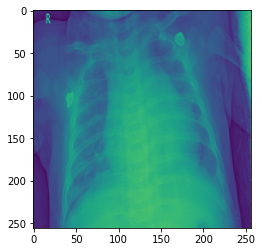

In [57]:
plt.imshow(X_clean[2])

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_clean)

LabelEncoder()

In [59]:
le.classes_

array(['bacterial_pneumonia', 'covid-19', 'normal', 'viral_pneumonia'],
      dtype='<U19')

In [60]:
y_clean=le.transform(y_clean)

In [61]:
np.unique(y_clean)

array([0, 1, 2, 3])

In [62]:
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y_clean)

In [63]:
y_cat

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [64]:
del(y_clean)

## Split Data

In [65]:
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [66]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_cat, test_size=0.2 )

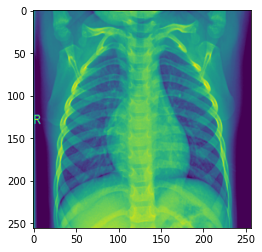

In [67]:
plt.imshow(X_train[2])

In [68]:
import pickle
file = open('y_train_b', 'wb')

# dump information to that file
y_train = pickle.dump(y_train,file)

# close the file
file.close()

In [69]:
import pickle
file = open('y_test_b', 'wb')

# dump information to that file
y_train = pickle.dump(y_test,file)

# close the file
file.close()

In [70]:
import pickle
file = open('X_train_b', 'wb')

# dump information to that file
y_train = pickle.dump(X_train,file)

# close the file
file.close()

In [71]:
import pickle
file = open('X_test_b', 'wb')

# dump information to that file
y_train = pickle.dump(X_test,file)

# close the file
file.close()

In [ ]:
#y_train.size()

In [ ]:
#X_experiment=np.stack([X_train]*3, axis=-1)

In [73]:
y_train.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
#plt.imshow(X_experiment[2])

In [ ]:
#X_experiment[2].shape

## Expand

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
# from tensorflow.keras.backend import expand_dims

# X_train_ex= expand_dims(X_train, axis=-1)
# X_test_ex= expand_dims(X_test, axis=-1)

# print(X_train_ex.shape)
# print(X_test_ex.shape)

In [ ]:
# from skimage.color import gray2rgb

# X_train_col = gray2rgb(X_train)
# X_test_col = gray2rgb(X_test)

In [ ]:
# X_test_col.shape

## Model

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import tensorflow as tf

num_classes = 4
def initialize_model():
    model = tf.keras.Sequential([
      layers.Conv2D(64, 3, activation='relu', input_shape=(256, 256, 3)),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(16, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(8, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(4, activation='softmax')
    ])
    return model



In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [ ]:
model = initialize_model()


model.compile(
  optimizer='adam',
  loss= 'categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
es = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history=model.fit(X_train_ex, y_train,
          batch_size=32,
          epochs=100,
          validation_split=0.2,
          shuffle = True,
          callbacks=[es])

In [ ]:
def plot_history(history, title='', axs=None, exp_name=''):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()
    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [ ]:
plot_history(history)
plt.show()

In [ ]:
from tensorflow.keras import models
models.save_model(model, '/Users/macbookair/code/sarasiro/ChestXraydetection/models')

In [ ]:
!pwd

In [ ]:
model.predict()

# Transfer Learning

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

X_trans=tf.keras.applications.vgg16.preprocess_input(
    X_experiment, data_format=None
)

In [ ]:
X_trans[0].max()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, Sequential
from tensorflow.keras import models


def load_model():
    model = VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
    return model

In [ ]:
model=load_model()

In [ ]:
def set_nontrainable_layers(model):
    model.trainable = False
    return model

In [ ]:
set_nontrainable_layers(model)

In [ ]:
def add_last_layers(model):
    base_model = load_model()
    base_model = set_nontrainable_layers(base_model)
    flattening_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(4, activation='softmax')
    model = Sequential([
    base_model,
    flattening_layer,
    dense_layer,
    prediction_layer])
    return model

In [ ]:
model = add_last_layers(model)

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=1e-4)

def compile_model(model):
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    return model

In [ ]:
def build_model():
    model=load_model()
    model=add_last_layers(model)
    model=compile_model(model)
    return model



In [ ]:
model = build_model()

In [ ]:
plt.imshow(X_norm[2])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_model,y_cat,
          batch_size=16,
          epochs=50, validation_split=0.2, callbacks=[es])